<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB


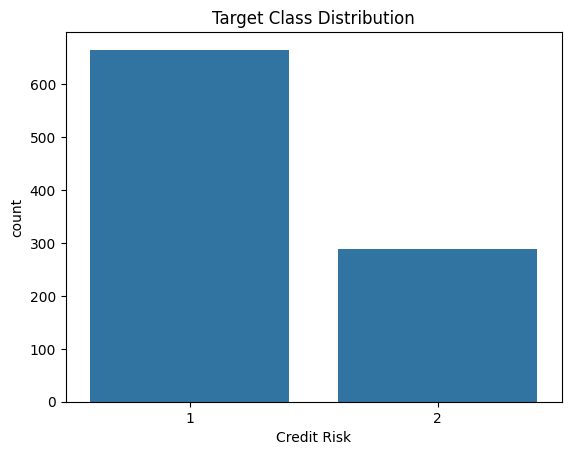

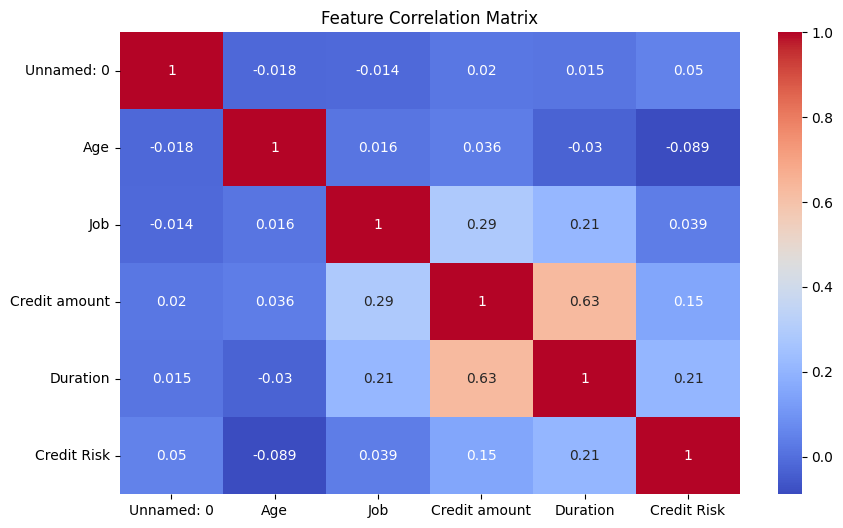

In [ ]:
#STEP 1: EXPLORATORY DATA ANALYSIS (EDA)
# 1.Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("german_credit_data_updated.csv")

# Basic view
df.head()

#2. Dataset Shape (How Big Is This Beast?)
df.shape

#3. Column Names & Data Types
df.info()

#4. Statistical Summary (Numerical Features)
df.describe()

#5. Check Missing Values
df.isnull().sum()

#6. Identify Target Variable Distribution
df.iloc[:, -1].value_counts()

#7. Visualize Target Distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Target Class Distribution")
plt.show()

#8. Correlation Analysis (Numerical Only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# STEP 3: DATA CLEANING & PREPROCESSING
# Drop index column safely
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Handle missing values
df.fillna({
    "Saving accounts": "none",
    "Checking account": "none"
}, inplace=True)

# Encode categorical variables
categorical_cols = ["Sex", "Housing", "Saving accounts",
                    "Checking account", "Purpose"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Final check
df_encoded.shape


(954, 22)

In [ ]:
#STEP 4: TRAIN–TEST SPLIT + FEATURE SCALING
#identify Target Variable
df_encoded.columns # This line will print the column names. Please identify the correct target column from the output.

#Separate X and y
# IMPORTANT: Replace "YOUR_TARGET_COLUMN_NAME" with the actual name of your target column.
# For example, if the target column is named 'CreditStatus', change it to X = df_encoded.drop(columns=["CreditStatus"])
# and y = df_encoded["CreditStatus"]
X = df_encoded.drop(columns=["Credit Risk"])
y = df_encoded["Credit Risk"]
y = y.map({1: 1, 2: 0}) # Adjust this mapping if your target variable has different values (e.g., 0 and 1 already).

#Train-Test Split (Stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Feature Scaling (Numerical Columns Only)
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

#Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


#STEP 5: BASELINE MODEL – LOGISTIC REGRESSION
#Train Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

#Predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

#Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.54      0.36      0.43        58
           1       0.76      0.86      0.81       133

    accuracy                           0.71       191
   macro avg       0.65      0.61      0.62       191
weighted avg       0.69      0.71      0.69       191

ROC-AUC Score: 0.7365828364013483


In [ ]:
df_encoded.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate', 'Saving accounts_none',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_none',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

In [ ]:
# ==============================
# STEP 4: TRAIN–TEST SPLIT
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Separate features and target
X = df_encoded.drop(columns=["Credit Risk"])
y = df_encoded["Credit Risk"]

# If your target is already 0/1, this is fine.
# If not, adjust mapping accordingly.
# y = y.map({1: 1, 2: 0})

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==============================
# STEP 5: FEATURE SCALING
# ==============================

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# ==============================
# STEP 6: MODELS
# ==============================

# ---- Logistic Regression ----
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
roc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC:", roc_lr)


# ---- Decision Tree ----
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
roc_dt = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC:", roc_dt)


# ---- Random Forest ----
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
roc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC:", roc_rf)

# ==============================
# STEP 7: MODEL COMPARISON
# ==============================

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "ROC-AUC": [roc_lr, roc_dt, roc_rf]
})

print("\n=== Model Comparison ===")
print(results)


=== Logistic Regression ===
              precision    recall  f1-score   support

           1       0.78      0.90      0.84       133
           2       0.66      0.43      0.52        58

    accuracy                           0.76       191
   macro avg       0.72      0.67      0.68       191
weighted avg       0.75      0.76      0.74       191

ROC-AUC: 0.7568058076225046

=== Decision Tree ===
              precision    recall  f1-score   support

           1       0.73      0.89      0.80       133
           2       0.50      0.24      0.33        58

    accuracy                           0.70       191
   macro avg       0.62      0.57      0.56       191
weighted avg       0.66      0.70      0.66       191

ROC-AUC: 0.6858957739175525

=== Random Forest ===
              precision    recall  f1-score   support

           1       0.77      0.92      0.84       133
           2       0.68      0.36      0.47        58

    accuracy                           0.75       19

In [ ]:
# =====================================
# CREDIT SCORING MODEL
# =====================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# -------------------------------------
# 1. LOAD DATASET
# -------------------------------------
# df = pd.read_csv("credit_data.csv")
# Assuming df is already loaded and preprocessed (df_encoded)

# -------------------------------------
# 2. FEATURE ENGINEERING
# -------------------------------------
# Example financial history–based features
if "Credit amount" in df.columns and "Duration" in df.columns:
    df["Debt_to_Duration"] = df["Credit amount"] / df["Duration"]

# -------------------------------------
# 3. PREPARE FEATURES & TARGET
# -------------------------------------
X = df_encoded.drop(columns=["Credit Risk"])
y = df_encoded["Credit Risk"]   # 1 = good credit, 0 = bad credit

# -------------------------------------
# 4. TRAIN–TEST SPLIT
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -------------------------------------
# 5. FEATURE SCALING
# -------------------------------------
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------------
# 6. LOGISTIC REGRESSION
# -------------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
roc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC:", roc_lr)

# -------------------------------------
# 7. DECISION TREE
# -------------------------------------
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
roc_dt = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC:", roc_dt)

# -------------------------------------
# 8. RANDOM FOREST
# -------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
roc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC:", roc_rf)

# -------------------------------------
# 9. MODEL COMPARISON
# -------------------------------------
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "ROC-AUC": [roc_lr, roc_dt, roc_rf]
})

print("\n=== Model Performance Comparison ===")
print(results)


=== Logistic Regression ===
              precision    recall  f1-score   support

           1       0.78      0.90      0.84       133
           2       0.66      0.43      0.52        58

    accuracy                           0.76       191
   macro avg       0.72      0.67      0.68       191
weighted avg       0.75      0.76      0.74       191

ROC-AUC: 0.7568058076225046

=== Decision Tree ===
              precision    recall  f1-score   support

           1       0.73      0.89      0.80       133
           2       0.50      0.24      0.33        58

    accuracy                           0.70       191
   macro avg       0.62      0.57      0.56       191
weighted avg       0.66      0.70      0.66       191

ROC-AUC: 0.6858957739175525

=== Random Forest ===
              precision    recall  f1-score   support

           1       0.77      0.92      0.84       133
           2       0.68      0.36      0.47        58

    accuracy                           0.75       19